In [1]:
%matplotlib notebook

Simulation of diffusion of odor

Got script from Matthieu Louis in Matlab - this is just a translation of his script
I'll leave original script in here as it's very short - should help with debugging
ALL DISTANCE IN CM!! Inherited from the diffusion coefficient
For example, if dish_diameter is give for 10cm, the final plot will be a total of 10cm! Not 1000

In [2]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt
from matplotlib import ticker
import os
from pathlib import Path

In [3]:
home_path = os.getcwd()

In [6]:
# all the figures will be saved in this folder
target_path = Path('data/')
os.chdir(home_path)
Path(target_path).mkdir(parents=True, exist_ok=True) 

In [8]:

#function concXY = solution_1Source(x,y,t,D)
def solution_1Source(x,y,t,D):
    # % distances in cm
    # C1=1; % top left source
    source=1
    #xs1=[4.5,4.5,1]; % XYZ position of the source. Note that gradient is calculated on a plate at a Z distance from the source that is given by xs1(3). Here 1 cm.
    xs1=[5,5,1]

    # % Analytical solution of diffusion equation
    # concXY = C1 / (4 * pi * D * ((x - xs1(1)) ^ 2 + (y - xs1(2)) ^ 2 + xs1(3)) ^ 0.5) * (
    #     erfc(((x - xs1(1)) ^ 2 + (y - xs1(2)) ^ 2 + xs1(3)) ^ 0.5 / (4 * D * t) ^ 0.5));
    concXY = source/(4*np.pi*D*((x-xs1[0])**2 + (y - xs1[1])**2 + xs1[2])**0.5) * (
            erfc(((x - xs1[0]) ** 2 + (y - xs1[1]) ** 2 + xs1[2]) **0.5 / (4 * D * t) **0.5))
    return(concXY)

# D=0.025; % Diffusion coefficient of the odor in cm2/s
diffusion_coefficient = 0.025
dish_diameter = 10 # in cm

# time_vector = 1:30:300;
time_vector = np.arange(1,300,30) # this is seconds!

# vx=0:0.01:9; % diameter "vector" of the Petri dish. Distance given in cm.
diameter_vector = np.linspace(0, dish_diameter, int(1/0.01*dish_diameter)+1)

GradT=np.zeros((time_vector.shape[0],diameter_vector.shape[0], diameter_vector.shape[0]))

#for k=1:length(time_vector')
for k in range(time_vector.shape[0]):
    # for i=1:length(vx)
    for i in range(diameter_vector.shape[0]):
        # for j=1:length(vx)
        for j in range(diameter_vector.shape[0]):
            # GradT{k}(i,j)=solution_1Source(vx(i),vx(j),time_vector(k),D);
            GradT[k,i,j] = solution_1Source(diameter_vector[i], diameter_vector[j], time_vector[k], diffusion_coefficient)
#        end
#    end
#end


<IPython.core.display.Javascript object>


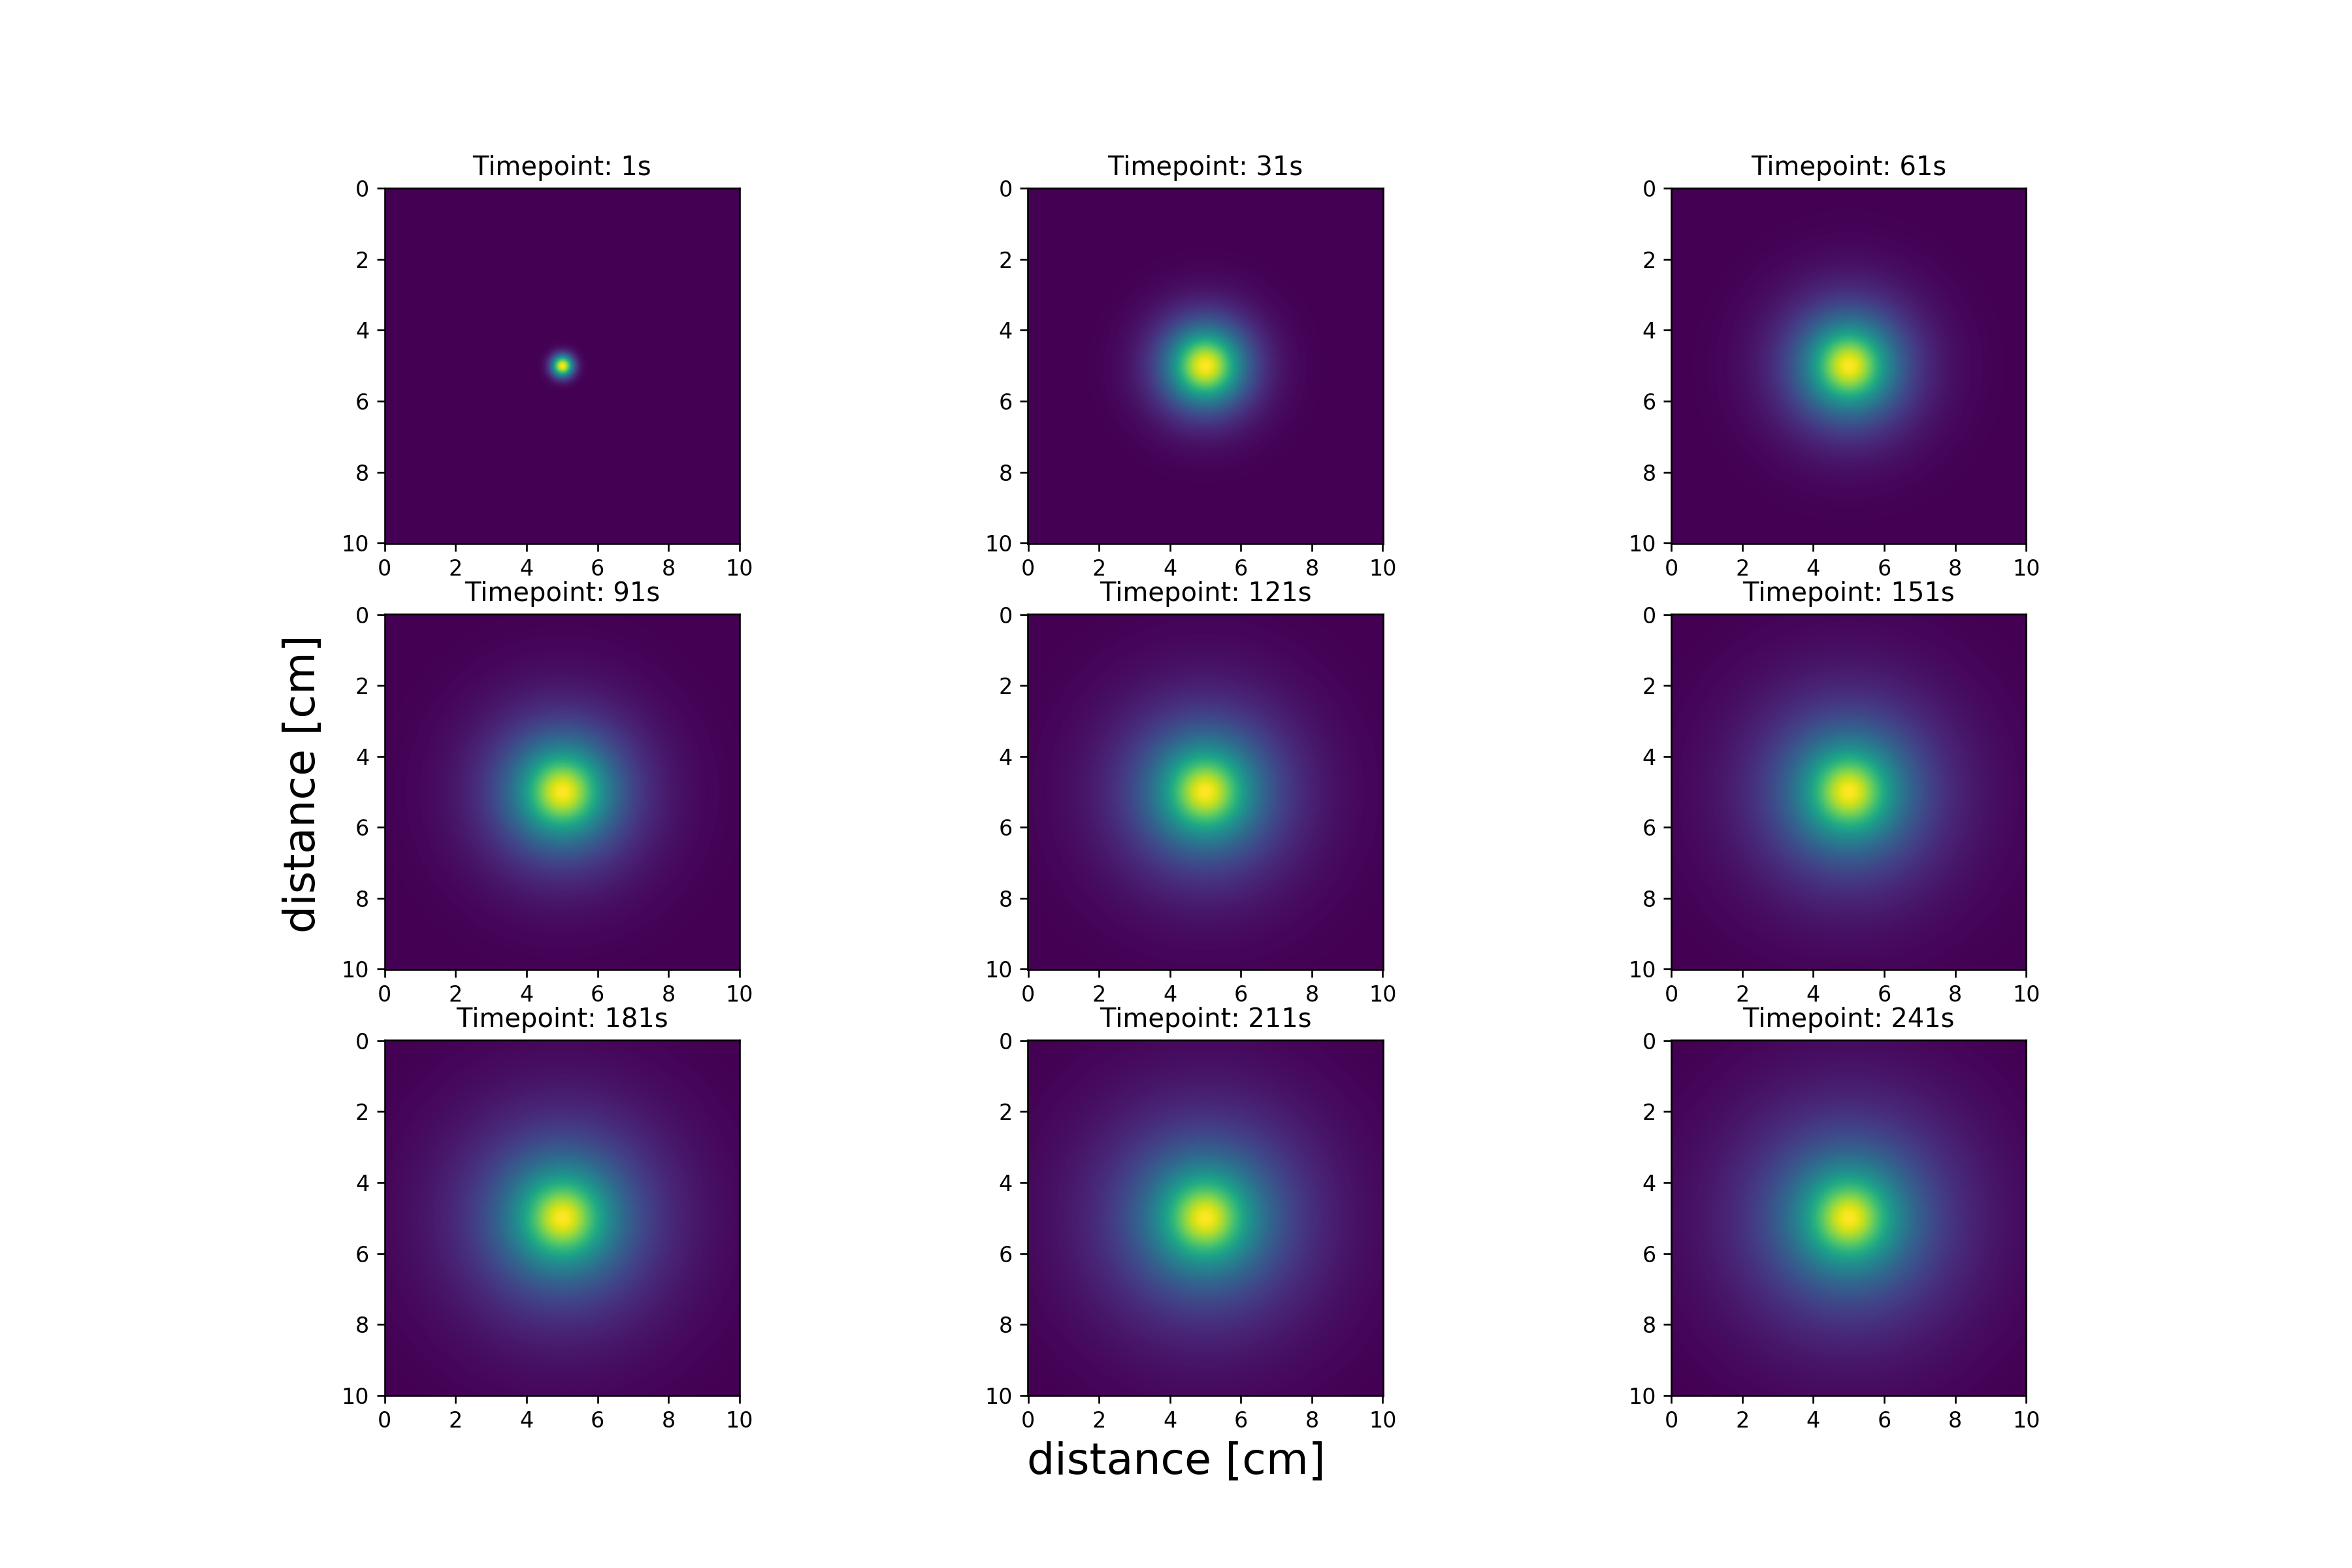

In [7]:
fig, axs = plt.subplots(3,3, figsize=(15,10)) # , sharex=True, sharey=True)
fig.text(0.5, 0.06, 'distance [cm]', ha='center', fontsize=20)
fig.text(0.12, 0.5, 'distance [cm]', va='center', fontsize=20, rotation='vertical')
axs = axs.ravel()
for k in range(time_vector.shape[0]-1):
    axs[k].imshow(GradT[k,:,:]) #, label='Timepoint: ' + repr(time_vector[k] + 's'))
    axs[k].set_title('Timepoint: ' + repr(time_vector[k]) + 's')
    majors = ["", "0", "2", "4", "6", "8", "10"]
    axs[k].xaxis.set_major_locator(ticker.MultipleLocator(200.0))
    axs[k].xaxis.set_major_formatter(ticker.FixedFormatter(majors))
    axs[k].yaxis.set_major_locator(ticker.MultipleLocator(200.0))
    axs[k].yaxis.set_major_formatter(ticker.FixedFormatter(majors))
    
os.chdir(home_path)
os.chdir(target_path)
fig.savefig('Timeseries of diffusion.png')
np.save('diffusion_time_series.npy', GradT)